# Final Project - Unsupervised and Reinforcement Learning

In [1]:
# Import the necessary libraries
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Specify the path to the .mat file
mat_file_path = r"X:\umist_cropped.mat"

# Load the .mat file using scipy.io
mat_data = scipy.io.loadmat(mat_file_path)

# Print the keys in the loaded .mat file to understand its structure
print("Keys:")
print(mat_data.keys())

# Extract the 'facedat' array from the loaded data
# 'facedat' likely contains the image data or features related to faces
facedat = mat_data['facedat']

# Extract the 'dirnames' array from the loaded data
# 'dirnames' likely contains directory names or labels associated with the face data
dirnames = mat_data['dirnames']

Keys:
dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])


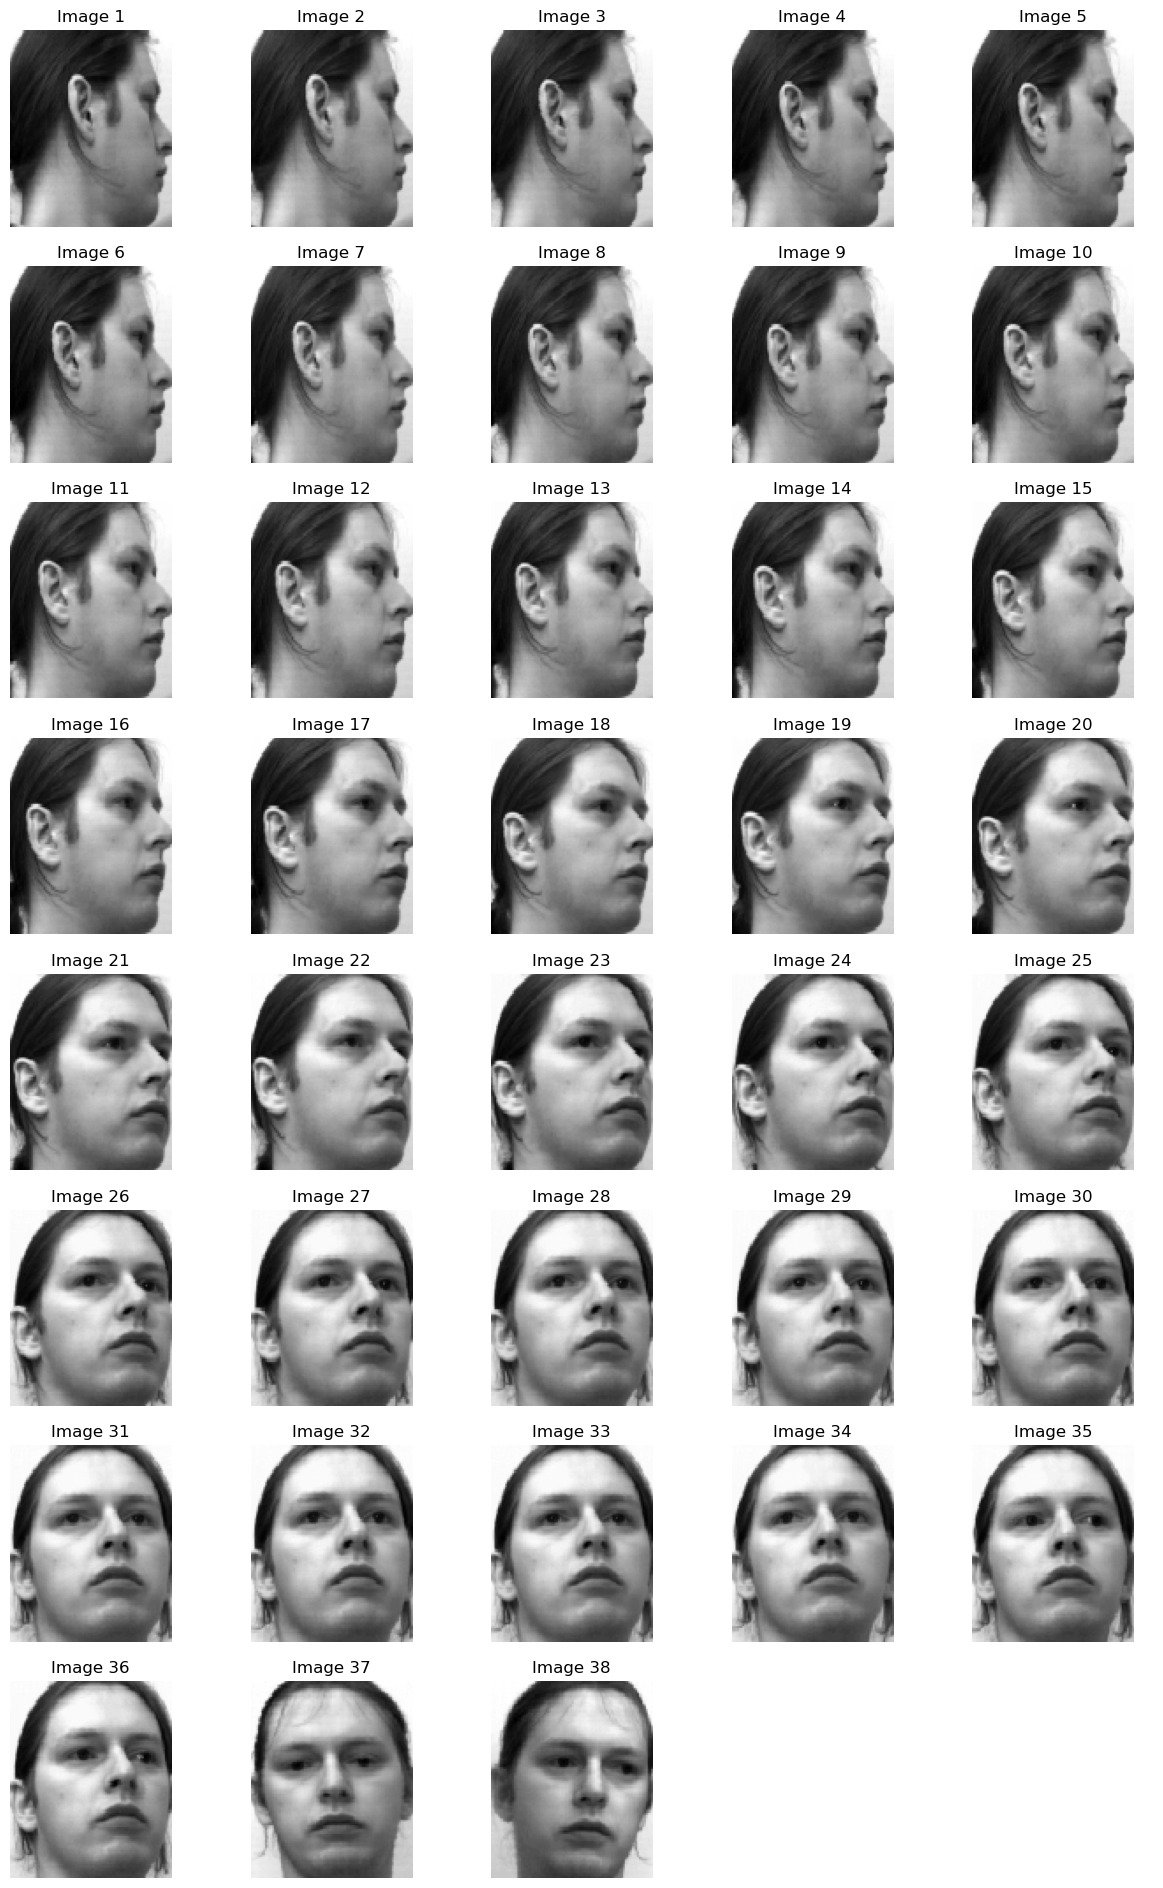

In [3]:
# Plot a sample of original images from the 'facedat' array.
all_images = facedat[0][0]
num_images = all_images.shape[2]
images_per_row = 5
num_rows = -(-num_images // images_per_row)
fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, num_rows * 3))
for i in range(num_rows):
    for j in range(images_per_row):
        image_index = i * images_per_row + j
        if image_index < num_images:
            axes[i, j].imshow(all_images[:, :, image_index], cmap='gray')
            axes[i, j].set_title(f'Image {image_index + 1}')
        axes[i, j].axis('off')

plt.show()

In [4]:
# Data Preparation and Flattening
all_images_list = facedat[0]
all_images = np.concatenate(all_images_list, axis=2)
height, width, num_images = all_images.shape
flattened_images = all_images.reshape((height * width, num_images), order='F')
data = flattened_images.T
print("Shape of data array:", data.shape)

Shape of data array: (575, 10304)


In [5]:
# Target Preparation
target_list = dirnames[0]

target_columns = []
for i in range(len(all_images_list)):
    num_images = all_images_list[i].shape[2]
    target_column = np.repeat(target_list[i], num_images)
    target_column = target_column.reshape((-1, 1))
    target_columns.append(target_column)
target = np.concatenate(target_columns, axis=0)
print("Shape of target:", target.shape)

unique_target, integer_target_mapping = np.unique(target, return_inverse=True)
target_array = integer_target_mapping + 1

Shape of target: (575, 1)


In [6]:
# Data Splitting
X = data
y = target_array

# Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=target_array)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Training Set (70%):", X_train.shape, y_train.shape)
print("Validation Set (15%):", X_val.shape, y_val.shape)
print("Testing Set (15%):", X_test.shape, y_test.shape)

Training Set (70%): (402, 10304) (402,)
Validation Set (15%): (86, 10304) (86,)
Testing Set (15%): (87, 10304) (87,)


In [7]:
# Data Normalization
X_train_normalized = X_train / 255.0
X_val_normalized = X_val / 255.0
X_test_normalized = X_test / 255.0

In [8]:
# Dimensionality Reduction using PCA
pca = PCA(n_components=0.99, random_state=42)
pca.fit(X_train_normalized)
X_train_pca = pca.transform(X_train_normalized)
X_val_pca  = pca.transform(X_val_normalized)
X_test_pca = pca.transform(X_test_normalized)

print("X Train Shape after pca:", X_train_pca.shape)
print("X Val Shape after pca:", X_val_pca.shape)
print("X Test Shape after pca:", X_test_pca.shape)

X Train Shape after pca: (402, 237)
X Val Shape after pca: (86, 237)
X Test Shape after pca: (87, 237)


In [9]:
# K-Means Clustering
kmeans = KMeans(n_clusters=20, random_state=42)

X_train_reduced = kmeans.fit_transform(X_train_pca)
X_val_reduced = kmeans.transform(X_val_pca)
X_test_reduced = kmeans.transform(X_test_pca)

X_train_kmeans_labels = kmeans.fit_predict(X_train_pca)
X_val_kmeans_labels = kmeans.predict(X_val_pca)
X_test_kmeans_labels = kmeans.predict(X_test_pca)

cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_

print(X_train_reduced.shape)
print(X_train_reduced[0])

(402, 20)
[17.21335518  8.89042541 17.74476301 20.38924541 19.88194905 18.16940106
 14.01956979 21.92318996 21.94548111 18.98158792 16.79984349 20.1699709
 12.42432273 21.80002093 26.84686736 20.3516374  26.16462419 19.06689106
 15.83377776 16.04370722]


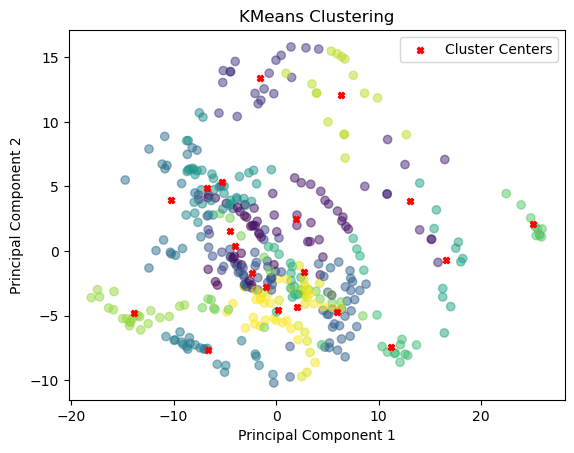

Shape of X_train_reduced: (402, 20)
Shape of X_valid_reduced: (86, 20)
Shape of X_test_reduced: (87, 20)
Shape of X_train_reduced: [17.21335518  8.89042541 17.74476301 20.38924541 19.88194905 18.16940106
 14.01956979 21.92318996 21.94548111 18.98158792 16.79984349 20.1699709
 12.42432273 21.80002093 26.84686736 20.3516374  26.16462419 19.06689106
 15.83377776 16.04370722]


In [10]:
# Visualization of KMeans Clustering
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=20, label='Cluster Centers')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_valid_reduced:", X_val_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)

print("Shape of X_train_reduced:", X_train_reduced[0])

In [11]:
# Building a Neural Network Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(X_train_reduced.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(57, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Training the Neural Network and Evaluating Accuracy
model.fit(X_train_reduced, y_train, epochs=500, validation_data=(X_val_reduced, y_val))

validation_accuracy = model.evaluate(X_val_reduced, y_val)[1]
test_accuracy = model.evaluate(X_test_reduced, y_test)[1]

print("Validation Accuracy:", validation_accuracy)
print("Test Accuracy:", test_accuracy)

Epoch 1/500
13/13 [==============================] - 1s 10ms/step - loss: 8.9553 - accuracy: 0.0498 - val_loss: 4.7779 - val_accuracy: 0.0465
Epoch 2/500
13/13 [==============================] - 0s 2ms/step - loss: 3.8009 - accuracy: 0.1045 - val_loss: 2.9635 - val_accuracy: 0.1860
Epoch 3/500
13/13 [==============================] - 0s 2ms/step - loss: 2.7487 - accuracy: 0.1965 - val_loss: 2.4730 - val_accuracy: 0.2558
Epoch 4/500
13/13 [==============================] - 0s 3ms/step - loss: 2.3829 - accuracy: 0.2488 - val_loss: 2.2252 - val_accuracy: 0.3023
Epoch 5/500
13/13 [==============================] - 0s 2ms/step - loss: 2.1554 - accuracy: 0.3557 - val_loss: 2.0981 - val_accuracy: 0.3140
Epoch 6/500
13/13 [==============================] - 0s 3ms/step - loss: 2.0549 - accuracy: 0.3682 - val_loss: 1.9627 - val_accuracy: 0.4070
Epoch 7/500
13/13 [==============================] - 0s 2ms/step - loss: 1.9098 - accuracy: 0.4328 - val_loss: 1.8693 - val_accuracy: 0.4302
Epoch 8/500


3/3 [==============================] - 0s 1ms/step


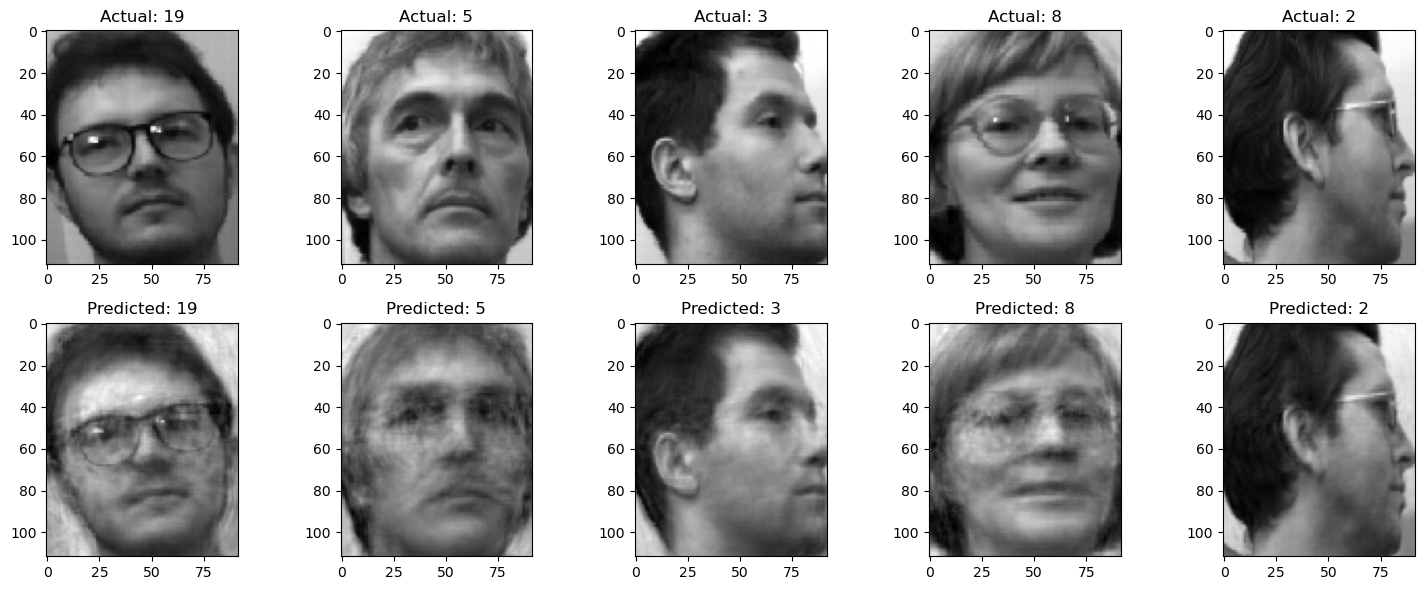

In [13]:
# Visualizing Predictions and Original Images
y_test_pred = model.predict(X_test_reduced)
predicted_clusters_test = np.argmax(y_test_pred, axis=1)

num_images = 5

fig, axes = plt.subplots(2, num_images, figsize=(15, 6))

for i in range(num_images):
    original_image = X_test[i].reshape((height, width), order='F')
    original_image_pca = pca.inverse_transform(X_test_pca[i]).reshape((height, width), order='F')
    true_cluster = y_test[i]
    predicted_cluster = predicted_clusters_test[i]

    # Display original images in the first row
    axes[0, i].imshow(original_image, cmap='gray')
    axes[0, i].set_title(f'Actual: {true_cluster}')

    # Display predicted images in the second row
    axes[1, i].imshow(original_image_pca, cmap='gray')
    axes[1, i].set_title(f'Predicted: {predicted_cluster}')

plt.tight_layout()
plt.show()

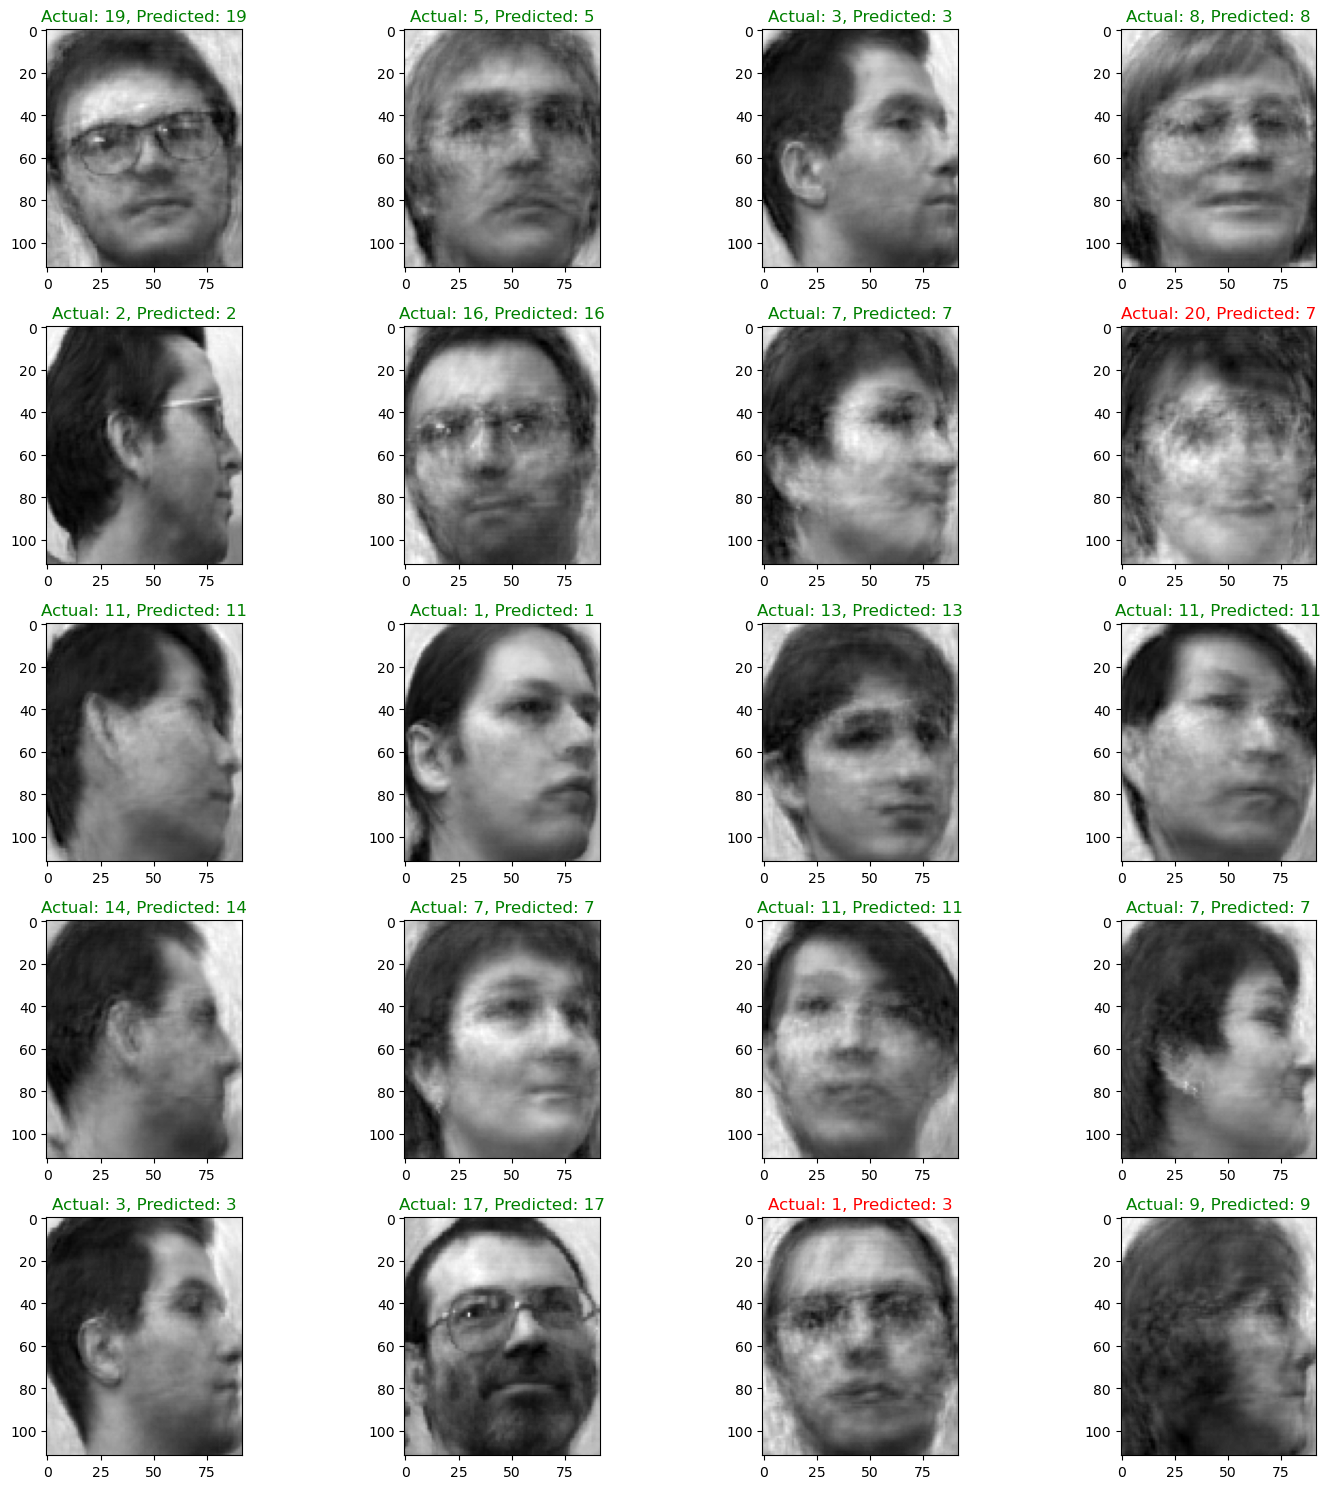

In [14]:
# Displaying Reconstructed Images with Predicted and Actual Clusters
num_images_to_display = 20

# Create a figure with the required number of rows and columns
num_rows = (num_images_to_display + 3) // 4  # Add 3 to handle odd numbers
fig, axes = plt.subplots(num_rows, 4, figsize=(15, 3 * num_rows))

# Flatten the 2D array of subplots to simplify indexing
axes = axes.flatten()

for i in range(num_images_to_display):
    original_image_pca = pca.inverse_transform(X_test_pca[i]).reshape((height, width), order='F')
    true_cluster = y_test[i]
    predicted_cluster = predicted_clusters_test[i]

    axes[i].imshow(original_image_pca, cmap='gray')

    title_color = 'green' if true_cluster == predicted_cluster else 'red'
    axes[i].set_title(f'Actual: {true_cluster}, Predicted: {predicted_cluster}', color=title_color)

plt.tight_layout()
plt.show()